# Example 1: Price increment

**About**: Se consideran los siguientes datos, correspondientes a la tasa de incrementos de precios al consumo para 24 países de la OCDE:

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox
import math

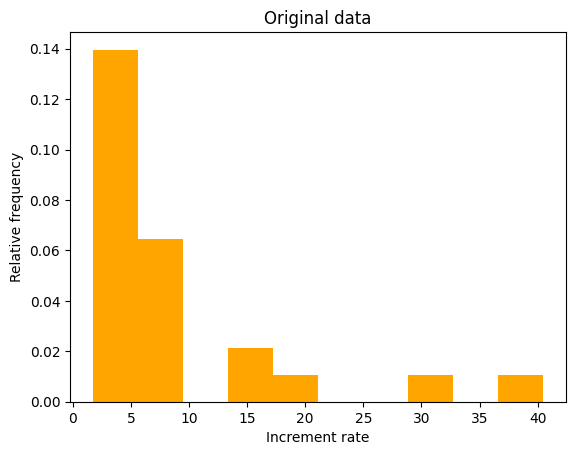

In [2]:
prices_rate = [2.2, 7.6, 2.9, 4.6, 4.1, 3.9, 7.4, 3.2, 5.1, 5.3, 20.1, 2.3, 5.5, 32.7, 9.1, 1.7, 3.2, 5.8, 16.3, 15.9, 5.9, 6.7, 3.4, 40.5]

# set empty array for each lambda
minus_two = []
minus_one = []
minus_zero_dot_five = []
zero = []
zero_dot_five = []
# one = [prices_rate] # same as original prices_rate data array
two = []

# let's see the original profile data "original data"
plt.hist(prices_rate, color="orange", density=True)

# set table labels
plt.title("Original data")
plt.xlabel("Increment rate")
plt.ylabel("Relative frequency")
plt.show()

In [3]:
def normalize_lambda(prices_rate):
    for i in prices_rate:
        minus_two.append(1/ i ** 2)
        minus_one.append(1/ i)
        minus_zero_dot_five.append(1/ math.sqrt(i))
        zero.append(math.log(i))
        zero_dot_five.append(math.sqrt(i))
        two.append(i**2)
    
    print(f"minus_two: {minus_two}\n", f"minus_one: {minus_one}\n", f"minus_zero_dot_five: {minus_zero_dot_five}\n", f"zero: {zero}\n", f"zero_dot_five: {zero_dot_five}\n", f"two: {two}\n")
    
normalize_lambda(prices_rate)

minus_two: [0.20661157024793386, 0.01731301939058172, 0.11890606420927467, 0.047258979206049156, 0.0594883997620464, 0.06574621959237344, 0.018261504747991233, 0.09765624999999999, 0.03844675124951942, 0.0355998576005696, 0.0024751862577658966, 0.18903591682419663, 0.03305785123966942, 0.0009351999925183999, 0.01207583625166043, 0.34602076124567477, 0.09765624999999999, 0.029726516052318668, 0.003763784862057285, 0.003955539733396622, 0.02872737719046251, 0.022276676319893073, 0.08650519031141869, 0.0006096631611034903]
 minus_one: [0.45454545454545453, 0.13157894736842105, 0.3448275862068966, 0.2173913043478261, 0.24390243902439027, 0.25641025641025644, 0.13513513513513511, 0.3125, 0.19607843137254904, 0.18867924528301888, 0.04975124378109452, 0.4347826086956522, 0.18181818181818182, 0.030581039755351678, 0.10989010989010989, 0.5882352941176471, 0.3125, 0.1724137931034483, 0.06134969325153374, 0.06289308176100629, 0.1694915254237288, 0.14925373134328357, 0.29411764705882354, 0.0246913

In [13]:
# use shapiro for p-value and statics (normal distribution)
def shapiro_func():
    phnorm_minus_two = shapiro(minus_two)
    phnorm_minus_one = shapiro(minus_one)
    phnorm_minus_zero_dot_five = shapiro(minus_zero_dot_five)
    phnorm_zero = shapiro(zero)
    phnorm_zero_dot_five = shapiro(zero_dot_five)
    phnorm_two = shapiro(two)

    print(f"minus_two: {phnorm_minus_two}", f"minus_one: {phnorm_minus_one}", f"minus_zero_dot_five: {phnorm_minus_zero_dot_five}", f"zero: {phnorm_zero}", f"zero_dot_five: {phnorm_zero_dot_five}", f"two: {phnorm_two}", sep='\n')

    print(f"\nfor phnorm_minus_two 'p-value' is greater or equal than 'alpha': {phnorm_minus_two[1] > 0.05}", f"for phnorm_minus_one 'p-value' is greater or equal than 'alpha': {phnorm_minus_one[1] > 0.05}", f"for phnorm_minus_zero_dot_five 'p-value' is greater or equal than 'alpha': {phnorm_minus_zero_dot_five[1] > 0.05}", f"for phnorm_zero 'p-value' is greater or equal than 'alpha': {phnorm_zero[1] > 0.05}", f"for phnorm_zero_dot_five 'p-value' is greater or equal than 'alpha': {phnorm_zero_dot_five[1] > 0.05}", f"for phnorm_two 'p-value' is greater or equal than 'alpha': {phnorm_two[1] > 0.05}", sep='\n')
    
shapiro_func()

minus_two: ShapiroResult(statistic=0.7436999082565308, pvalue=4.035388337797485e-05)
minus_one: ShapiroResult(statistic=0.9366051554679871, pvalue=0.1369950920343399)
minus_zero_dot_five: ShapiroResult(statistic=0.9816646575927734, pvalue=0.924431562423706)
zero: ShapiroResult(statistic=0.9388211965560913, pvalue=0.15353980660438538)
zero_dot_five: ShapiroResult(statistic=0.818763792514801, pvalue=0.0006067482754588127)
two: ShapiroResult(statistic=0.4838101863861084, pvalue=3.940719039974283e-08)

for phnorm_minus_two 'p-value' is less or equal than 'alpha': False
for phnorm_minus_one 'p-value' is less or equal than 'alpha': True
for phnorm_minus_zero_dot_five 'p-value' is less or equal than 'alpha': True
for phnorm_zero 'p-value' is less or equal than 'alpha': True
for phnorm_zero_dot_five 'p-value' is less or equal than 'alpha': False
for phnorm_two 'p-value' is less or equal than 'alpha': False


[1.38032253 0.8638745  1.13645674 1.0731862  1.04474994 1.36858562
 0.92641111 1.1907245  1.21037852 1.73182378 0.70632291 1.22901559
 1.86184803 1.45634451]
Valor de lambda optimo para usarse en la transformation: -0.4073528258240791


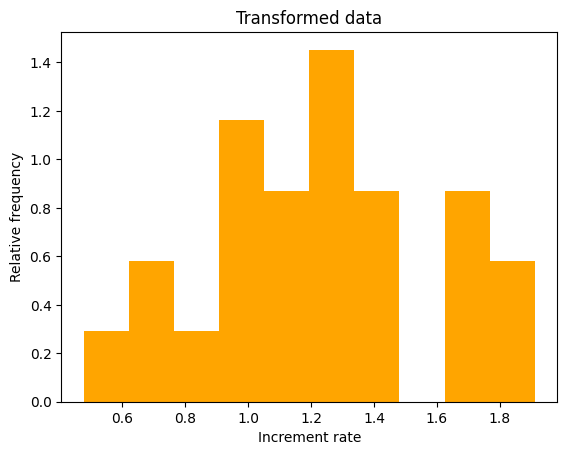

In [16]:
def lambda_boxcox(prices_rate):
    # Looking for the best lambda
    prices_rate_transform, lambda_optimo = boxcox(prices_rate)

    # Let's see first 15 data transformations
    print(prices_rate_transform[1:15])

    # * minus_zero_dot_five is the best lambda because 'p-value' is less or equal than 'alpha' so the data is more normal distributed
    print(f"Valor de lambda optimo para usarse en la transformation: {lambda_optimo}")

    plt.hist(prices_rate_transform, color="orange", density=True)
    plt.title("Transformed data")
    plt.xlabel("Increment rate")
    plt.ylabel("Relative frequency")
    plt.show()

lambda_boxcox(prices_rate)

**¿Los datos son normales? Si no es así, encuentra el valor óptimo de lambda y transfórmalos.** No, los datos no eran normales, es por eso que se tuvieron que normalizar con el valor de lambda = 0.05 con ayuda de la función boxcox. Podemos ver que los datos se normalizaron al graficarlos al comparar la gráfica de la función boxcox ('Transformed data') con la gráfica de la función normal ('Original data').